<a href="https://colab.research.google.com/github/adepu93/Classification-Credit-Risk-prediction-/blob/main/UNP_DSML_Classification_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Data***
The term 'data' in a project broadly refers to all the information and documents collected, analyzed, and utilized to plan, execute, monitor, and control the project. This data plays a pivotal role in making informed decisions, managing risks, and ensuring, that the project objective are met. By leveraging this information, project managers can take well-informed decisions and steer the project towards a successful conclusion.

#***Importing Python Libraries***
To proceed with data analysis and visualization in Python, we must important modules such as pandas, numpy, seaborn, and matplotlib. Pandas is used for data analysis, numpy for calculating n-dimensional arrays, and seaborn and matplotlib for data visualization.

In [ ]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sb

#***Importing Machine Learning Libraries***
To perform machine learning tasks such as creating regression lines, splitting the lines, and predicting values, we need to import some important modules from the sci-kit-learn library (sklearn). These modules include train_test_split, DecisionTreeClassifier, classification_report, confusion_matrix, RandomForestClassifier.

In [ ]:
# Importing Train Test Split
from sklearn.model_selection import train_test_split
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Importing K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
# Importing K Means Clustering
from sklearn.cluster import KMeans
# Importing XG Boost Classifier and Regressor
from xgboost import XGBClassifier, XGBRegressor
# Importing SVC
from sklearn.svm import SVC
# Importing Accuracy Score, Precision Score, Recall Score, F1 Score, Roc Auc Score, Confusion Matrix, and Classification Report
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

#***Reading the Data Set***
Usually, datasets come in CSV files, but in this case, the file is in Excel format. To read this Excel file in Python, we will use the Pandas library.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the Data Frame
df = pd.read_excel('/content/drive/MyDrive/related to UNP /german_credit.xlsx')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good


In [ ]:
df.shape

(1000, 21)

#***Renaming the Columns in the Data Set***
Occasionally, column names in a dataset might be too long or complex, making it time–consuming to reference them. In such cases, we can rename the columns to shorter or more convenient names, using the Pandas library.

In [ ]:
# Renaming the Columns in the Data Set
df.columns = ['Status', 'Duration', 'Credit History', 'Purpose', 'Amount', 'Savings', 'Employment Duration', 'Installment Rate', 'Personal Status Sex', 'Other Debtors', 'Present Residence', 'Property', 'Age', 'Other Installment Plans', 'Housing', 'Number Credits', 'Job', 'People Liable', 'Telephone', 'Foreign Worker', 'Credit Risk']
df.head()

,Status,Duration,Credit History,Purpose,Amount,Savings,Employment Duration,Installment Rate,Personal Status Sex,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Number Credits,Job,People Liable,Telephone,Foreign Worker,Credit Risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good


#***Replacing Good and Bad with 1 and 0 respecively for better analysis***

In [ ]:
df['Credit Risk'] = df['Credit Risk'].replace({'good': 1, 'bad': 0})
df.head()

,Status,Duration,Credit History,Purpose,Amount,Savings,Employment Duration,Installment Rate,Personal Status Sex,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Number Credits,Job,People Liable,Telephone,Foreign Worker,Credit Risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,1


#***Data Cleaning***
Data cleaning is a meticulous and time-consuming process that requires a keen eye for detail, an in-depth understanding of the domain, and the use of appropriate tools and techniques. It is an indispensable step in any data-related project, as accurate and reliable data is crucial to making informed decisions and achieving precise results in data analysis, machine learning, and other data-driven tasks. Without proper data cleaning, the output of a project can be severely impacted by inaccuracies and inconsistencies in the data. Therefore, it is imperative to invest time and effort in data cleaning to ensure the quality and integrity of the data.


#***Dropping Duplicate Values of the Data Set***
It is common for a dataset to contain duplicate rows. These duplicates only make the dataset larger and have no value for data analysis. Therefore, it is necessary to identify and drop any duplicate rows in the dataset.

In [ ]:
# Dropping the Duplicate Values
df = df.drop_duplicates()
df.head()

,Status,Duration,Credit History,Purpose,Amount,Savings,Employment Duration,Installment Rate,Personal Status Sex,Other Debtors,...,Property,Age,Other Installment Plans,Housing,Number Credits,Job,People Liable,Telephone,Foreign Worker,Credit Risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,1


#***Getting to know what type of Data Set we have***

To extract information from the dataset, we utilize a specific function after analyzing the data. During this analysis, we also take note of the null value count for each feature and determine the data type of the features present in the dataset.

In [ ]:
# Getting to know our Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Amount                   1000 non-null   int64 
 5   Savings                  1000 non-null   object
 6   Employment Duration      1000 non-null   object
 7   Installment Rate         1000 non-null   object
 8   Personal Status Sex      1000 non-null   object
 9   Other Debtors            1000 non-null   object
 10  Present Residence        1000 non-null   object
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other Installment Plans  1000 non-null   object
 14  Housing                  1000 non-null   

#***Describing the Data Set***
We can utilize the describe() function to provide an overview of the Data Set and calculate various statistics for each data point in the feature.

In [ ]:
# Describing the Data Set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0
Credit Risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0


#***Handling Null values***

To improve accuracy, we address any null values found in the dataset using the isnull() function.

In [ ]:
# Handling Null Values
df.isnull().sum()

Status                     0
Duration                   0
Credit History             0
Purpose                    0
Amount                     0
Savings                    0
Employment Duration        0
Installment Rate           0
Personal Status Sex        0
Other Debtors              0
Present Residence          0
Property                   0
Age                        0
Other Installment Plans    0
Housing                    0
Number Credits             0
Job                        0
People Liable              0
Telephone                  0
Foreign Worker             0
Credit Risk                0
dtype: int64

#***Finding all the unique values in the Data Set***

In pandas, there exists a method for discovering every distinct value within a dataset. This can be accomplished by utilizing the nunique() function.

In [ ]:
# Finding all the Unique value in the Data Set
df.nunique()

Status                       4
Duration                    33
Credit History               5
Purpose                     10
Amount                     923
Savings                      5
Employment Duration          5
Installment Rate             4
Personal Status Sex          4
Other Debtors                3
Present Residence            4
Property                     4
Age                         53
Other Installment Plans      3
Housing                      3
Number Credits               4
Job                          4
People Liable                2
Telephone                    2
Foreign Worker               2
Credit Risk                  2
dtype: int64

#***Exploratory Data Analysis(EDA)***
Exploratory Data Analysis (EDA) involves using both statistical and visual methods, and it can be an iterative process. It plays a crucial role in setting the foundation for any data analysis or modeling work. By thoroughly understanding the data through EDA, analysts can make more informed decisions about how to proceed and how to extract valuable insights from the dataset.

#***Pair plot***

A grid of axis is created by this function to display the pairwise relationship between the features in the dataset. The row's y-axis and column's x-axis are utilized to plot the correlation between each feature.

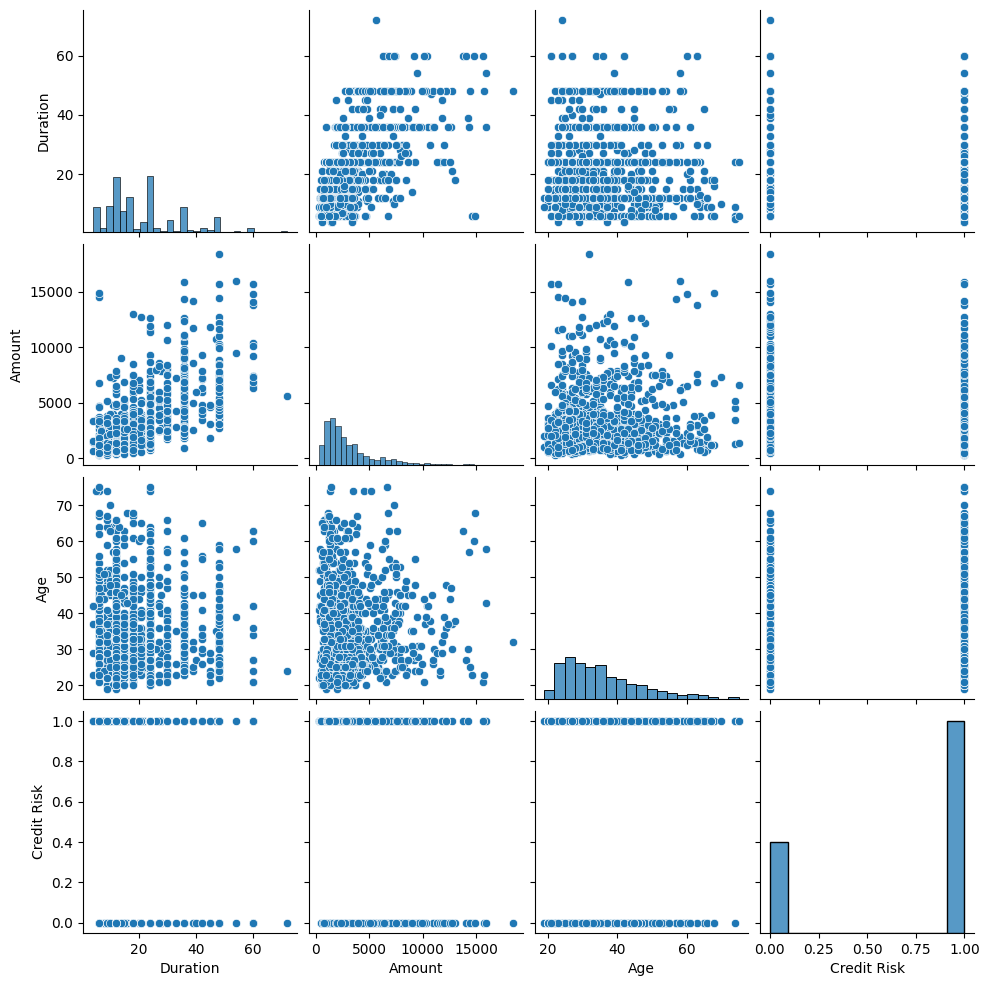

In [ ]:
# Pair Plot of the Data Set
sb.pairplot(df)

#***Scatter Plot***

This plot shows how two sets of data are related to each other.

#***Scatter Plot of Duration and Amount***

Text(0.5, 0, 'Amount')

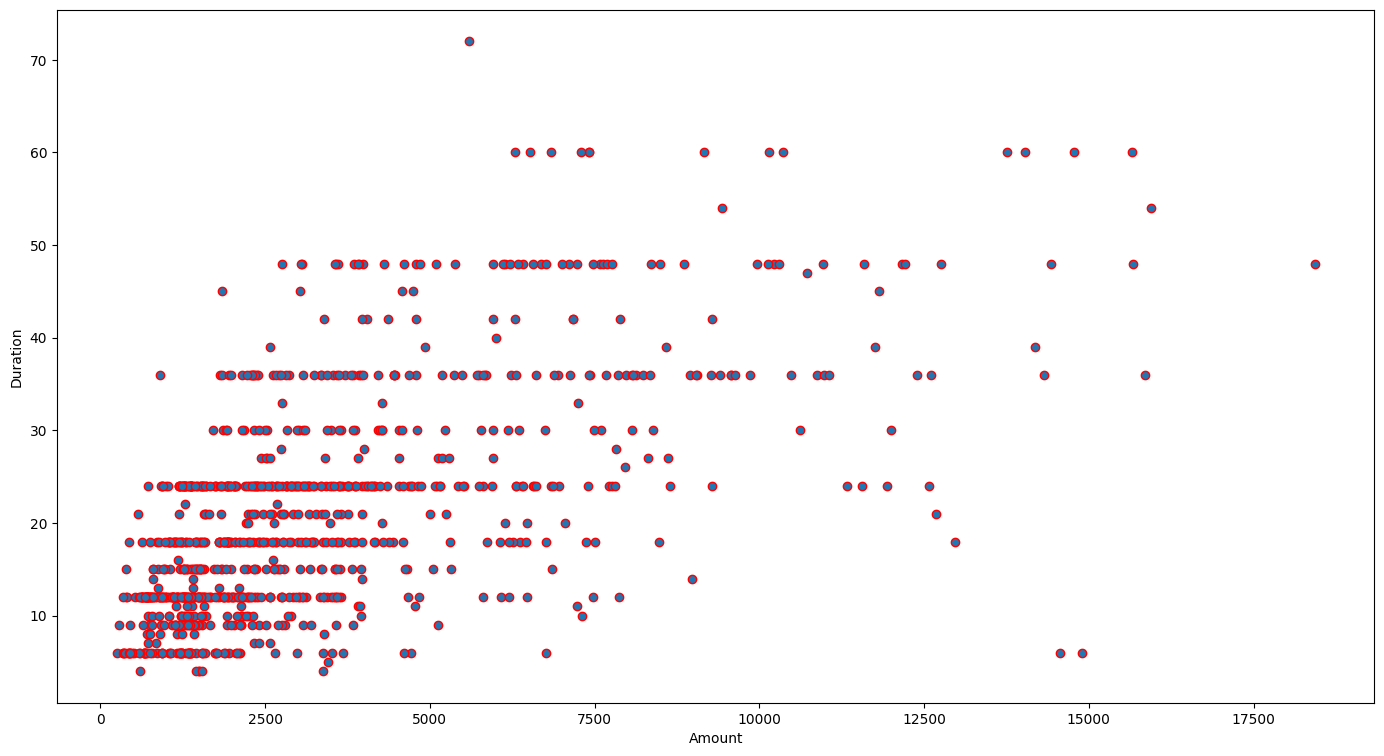

In [ ]:
# Scatter Plot of Duration and Amount
plt.figure(figsize = [17, 9])
plt.scatter(y = 'Duration', x = 'Amount', edgecolor = 'red', data = df)
plt.ylabel('Duration')
plt.xlabel('Amount')

#***Scatter Plot of Duration and Age***


Text(0.5, 0, 'Age')

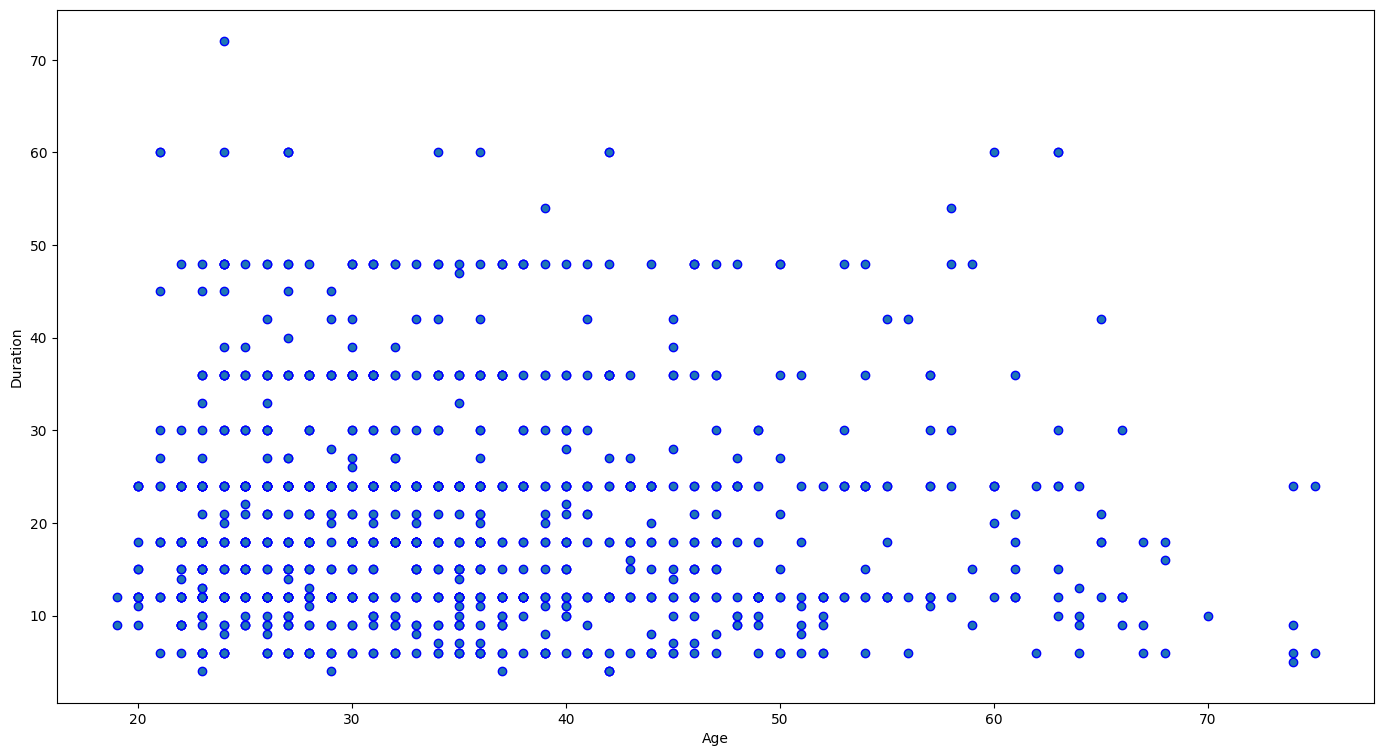

In [ ]:
# Scatter Plot of Duration and Age
plt.figure(figsize = [17, 9])
plt.scatter(y = 'Duration', x = 'Age', edgecolor = 'blue', data = df)
plt.ylabel('Duration')
plt.xlabel('Age')

#***Scatter Plot of Amount and Age***

Text(0.5, 0, 'Age')

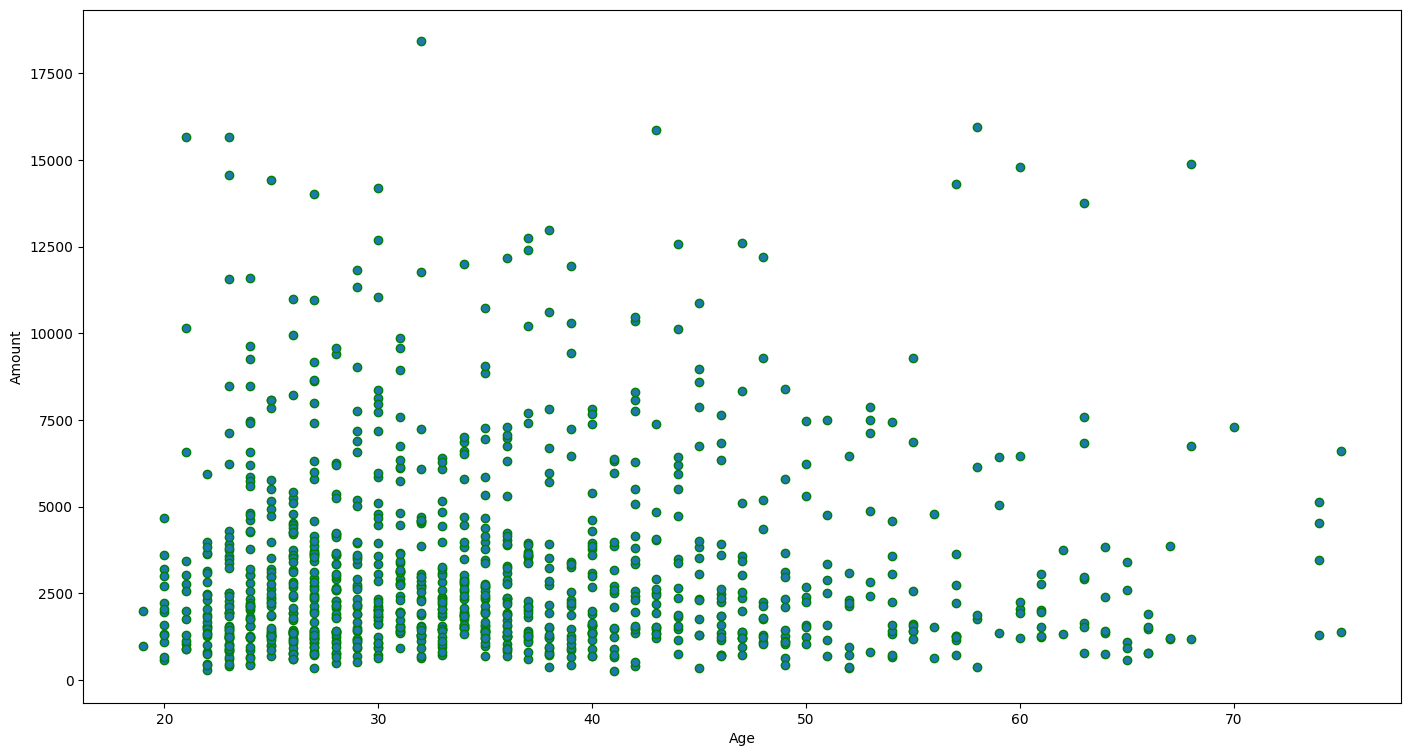

In [ ]:
# Scatter Plot of Amount and Age
plt.figure(figsize = [17, 9])
plt.scatter(y = 'Amount', x = 'Age', edgecolor = 'green', data = df)
plt.ylabel('Amount')
plt.xlabel('Age')

#***Correlation Plot***

The correlation plot is a visual representation of the correlation coefficient between variables, which is displayed in the form of a matrix-like table. To visualize the correlation between variables, we use the Seaborn library to plot the correlation plot. This plot displays a one-to-one relationship between variables, with each variable showing its relationship with another variable. Upon observing the heatmap, we can see that Age has a strong correlation with Amount.

<Axes: >

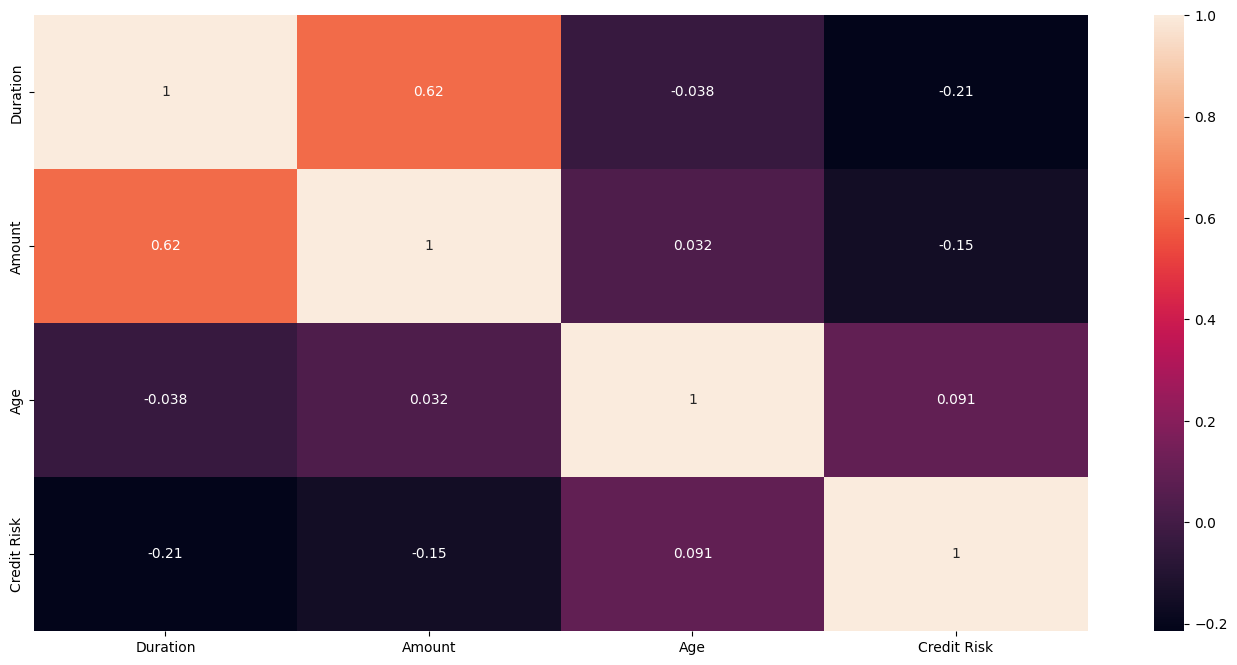

In [ ]:
plt.figure(figsize = [17, 8])
# Ploting Correlation Plot
sb.heatmap(df.corr(), annot = True)

Let's plot the outlier that's present in the dataset.

#***Box plot***

In the boxplot, it can be observed that there are black dots present on both the left and right sides of the lines. These dots represent outliers that are present in a specific feature of the dataset.

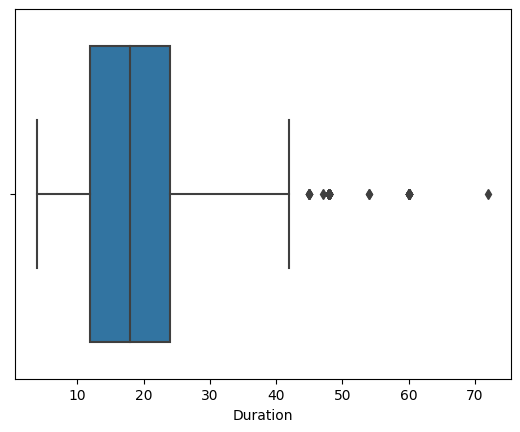

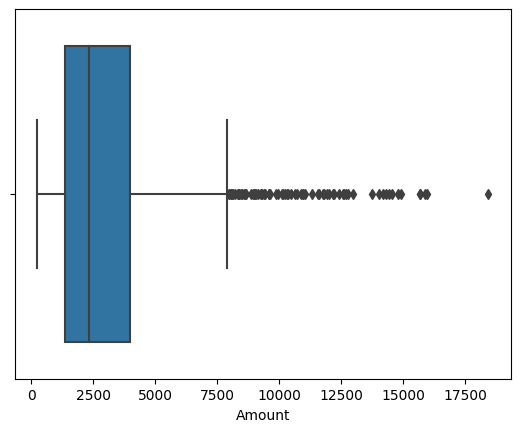

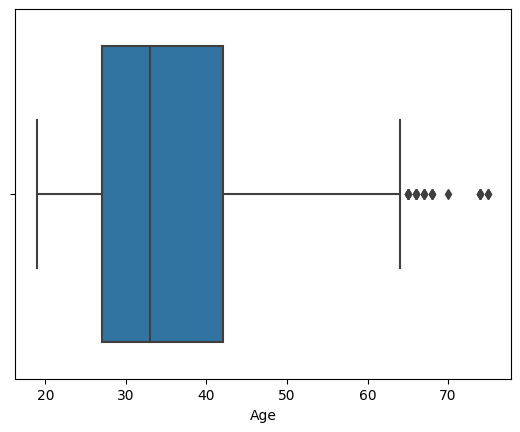

In [ ]:
l = ['Duration', 'Amount', 'Age']
for i in l:
  sb.boxplot(x = df[i])
  plt.show()

#***Applying Classification***
Classification in a project involves sorting or categorizing data or items into predefined groups based on their characteristics. It's a fundamental process used in various applications, such as sorting emails into spam and non-spam, classifying text sentiment, or identifying diseases from medical test results. This helps in data organization and decision-making.

#***Applying Dummy Variable***
Dummy variables are used in statistical analysis, particularly in regression analysis, to handle categorical data or factors. Categorical data represents categories, groups, or labels, rather than numerical values. These variables need to be converted into a format that can be used in regression models, and this is where dummy variables come into play.

In [ ]:
Elements = ['Purpose']
df = pd.get_dummies(df, columns = Elements, drop_first = True)
df.head()

,Status,Duration,Credit History,Amount,Savings,Employment Duration,Installment Rate,Personal Status Sex,Other Debtors,Present Residence,...,Credit Risk,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Purpose_vacation
0,no checking account,18,all credits at this bank paid back duly,1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,...,1,0,1,0,0,0,0,0,0,0
1,no checking account,9,all credits at this bank paid back duly,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,...,1,0,0,0,0,1,0,0,0,0
2,... < 0 DM,12,no credits taken/all credits paid back duly,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,...,1,0,0,0,0,0,0,0,1,0
3,no checking account,12,all credits at this bank paid back duly,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,...,1,0,0,0,0,1,0,0,0,0
4,no checking account,12,all credits at this bank paid back duly,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,...,1,0,0,0,0,1,0,0,0,0


#***Splitting the Data***
To split the training and testing parts, we can use the scikit-learn module train_test_split

In [ ]:
x = df[['Duration', 'Amount', 'Age', 'Purpose_car (new)', 'Purpose_car (used)', 'Purpose_domestic appliances', 'Purpose_furniture/equipment', 'Purpose_others',
        'Purpose_radio/television', 'Purpose_repairs', 'Purpose_retraining', 'Purpose_vacation']]
y = df['Credit Risk']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

X would have independent variables, and y would have the target variable. 30% of the dataset would be the testing data. For a deterministic train-test split, random_state is set to an integer value.

#***Applying Model***

#***Logistic Regression***

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)


Accuracy:  0.705


#***Decision Tree***

In [ ]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.68


#***Random Forest***

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.745


#***K-Nearest Neighbour (KNN)***

In [ ]:
k = 3
model = KNeighborsClassifier(n_neighbors = k)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.66


#***Ridge Logistic Regression***

In [ ]:
ridge_model = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.66


#***K-Means Clusterings***

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(xtest)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.66


#***XG Boost***

In [ ]:
model = XGBClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.715


#***Support Vector Machine (SVM)***

In [ ]:
model = SVC(kernel='linear')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print('Accuracy: ', accuracy)

Accuracy:  0.695
